<코스타리카 가구 빈곤 수준 예측>
> 목표 : 사호 복지 지원이 가장 필요한 가구 식별



<컬럼 설명>

> Target: 소득 수준 그룹 나타내는 변수
- 1=극심한빈곤
- 2=보통빈곤
- 3= 취약가구
- 4=비취약가구

> idhogar: 각 가구에 대한 고유 식별자

> parentesco1:세대주여부

<주의점>
>  가장만 점수를 매기는 데 사용된다 == 가구 단위로 빈곤을 예측

>  동일한 가구의 개인이 서로 다른 레이블을 갖는 오류는 각 가구의 가장에 대한 레이블을 사용

> **분류 데이터이므로 종속변수는 scaler 하든 안하든 간에 scale 당할 가능성이 없도록 (1,2,3,4 -> 0.25, 0.5, ...) string 처리 또는 의미(1,2,3,4-> 극심한 빈곤, 보통빈곤, ...)를 해두는 것이 현명.**
- <-**종속변수가 숫자여도 숫자의미를 갖지 않으므로 문자열로 변환.**

##### 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path='./drive/MyDrive/data/'
train_filename='train_Costa_Rican.csv'

In [3]:
import pandas as pd
import os
train = pd.read_csv(os.path.join(file_path, train_filename))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
train.head(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.0,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.0,64.0,144.0,4489,4


In [7]:
train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [8]:
a = train.groupby(['idhogar','parentesco1', 'Target'])['Id'].count().reset_index() # groupby 할 때 Target도 같이 넣어야지 target count 하지 않음음
a

,idhogar,parentesco1,Target,Id
0,001ff74ca,0,4,1
1,001ff74ca,1,4,1
2,003123ec2,0,2,3
3,003123ec2,1,2,1
4,004616164,0,2,1
...,...,...,...,...
5625,ffae4a097,1,4,1
5626,ffe90d46f,0,1,3
5627,ffe90d46f,1,1,1
5628,fff7d6be1,0,4,3


In [9]:
_parentesco1 = train[train['parentesco1']==1].copy()
_parentesco0 = train[~(train['parentesco1']==1)].copy() # ~ + 1

In [10]:
_p1_id = set(_parentesco1.idhogar.values)
len(_p1_id)

2973

In [11]:
_parentesco0['Target_v2']=_parentesco0['idhogar'].map(lambda x : True if x in _p1_id else False)
_parentesco0['Target_v2'].value_counts()

True     6561
False      23
Name: Target_v2, dtype: int64

In [12]:
_parentesco0 = _parentesco0[_parentesco0['Target_v2']==True]
len(_parentesco0)

6561

In [13]:
_parentesco1[_parentesco1['idhogar']=='d6c086aa3']['Target'] # map 넣기전에 먼저 실험하면 시간 단축됨됨

9552    2
Name: Target, dtype: int64

In [14]:
_parentesco0.loc[:,'Target_v2'] = _parentesco0['idhogar'].map(lambda x :  _parentesco1[_parentesco1['idhogar']==x]['Target'].values[0]) #loc['' ]== 컬럼으로 생김김
len(_parentesco0)

6561

In [15]:
_parentesco0.tail() # map, apply 사용 후에는 head 보다는 tail 하는게 시간 단축축

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Target_v2
9550,ID_90a399a51,NaN,0,3,0,1,1,0,NaN,0,...,3721,4,0,0,4.0000,1.0000,9.0000,3721,2,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,4,25,81,1,1.5625,0.0625,68.0625,4,2,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,2500,25,81,1,1.5625,0.0625,68.0625,2500,2,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,676,25,81,1,1.5625,0.0625,68.0625,676,2,2
9556,ID_a38c64491,80000.0,0,6,0,1,1,0,NaN,0,...,441,25,81,1,1.5625,0.0625,68.0625,441,2,2


In [16]:
len(_parentesco0[_parentesco0['Target']!= _parentesco0['Target_v2']])

140

In [17]:
_parentesco0[_parentesco0['Target']!= _parentesco0['Target_v2']].head(2)# ['idhogar'] 4b6077882

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Target_v2
283,ID_17d9dcd44,60000.0,0,3,0,1,0,0,NaN,0,...,49,9,0,4,9.0,4.0,25.0,49,2,1
284,ID_e78621924,60000.0,0,3,0,1,0,0,NaN,0,...,4,9,0,4,9.0,4.0,25.0,4,2,1


In [18]:
_parentesco0.drop('Target', axis=1, inplace=True)
_parentesco0 =_parentesco0.rename(columns={'Target_v2' : 'Target'})
_parentesco0 = _parentesco0[_parentesco1.columns.tolist()]

In [19]:
train_v2 = pd.concat([_parentesco0, _parentesco1], axis=0)

In [20]:
train_v2.Target.value_counts()
#train(old버전)
# 4    5996
# 2    1597
# 3    1209
# 1     755

4    6001
2    1558
3    1201
1     774
Name: Target, dtype: int64

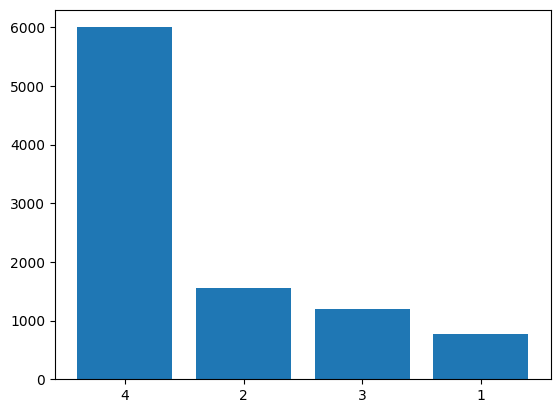

'클래스 수를 고려해서 train,valid 나눠야 함'

In [21]:
import matplotlib.pyplot as plt
train_v2= train_v2.astype({'Target' : str})
plt.bar(train_v2.Target.value_counts().index, train_v2.Target.value_counts().values, width=0.8, bottom= None, align='center')
plt.show()
#Target을 int에서 string으로 변경하여 plt.bar 시각화하면 기존의 x축이 0.5, 1, 1.5,2, ... -> 1,2,3,4로 딱 해당 카테고리만 나오게 됨.
'''클래스 수를 고려해서 train,valid 나눠야 함'''

### 전처리


In [22]:
len(train_v2)

9534

In [23]:
back_train = train_v2.copy()

##### na값 처리 및 대체

In [24]:
# na값이 전체 데이터의 0.7 비중 이상인 컬럼은 제외하겠다
train_v2.isna().sum().sort_values(ascending=False)[:10]/len(train_v2)
#rez_esc 학교로부터 몇년뒤ㄹ1
#v18q1 가구가 소유한 태블릿 수
#v2a1 월세

rez_esc         0.830816
v18q1           0.767674
v2a1            0.717747
SQBmeaned       0.000524
meaneduc        0.000524
Id              0.000000
hogar_adul      0.000000
parentesco10    0.000000
parentesco11    0.000000
parentesco12    0.000000
dtype: float64

In [25]:
train_v2.drop(['rez_esc', 'v18q1', 'v2a1'], axis=1, inplace=True)

In [26]:
train_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9534 entries, 3 to 9552
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(129), object(6)
memory usage: 10.3+ MB


(array([6.860e+02, 2.671e+03, 3.507e+03, 1.687e+03, 7.640e+02, 1.630e+02,
        3.200e+01, 1.400e+01, 2.000e+00, 3.000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

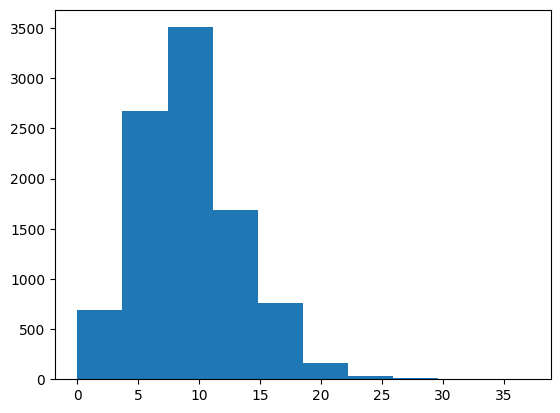

In [27]:
plt.hist('meaneduc',data=train_v2)

(array([7.194e+03, 1.939e+03, 2.780e+02, 8.000e+01, 1.900e+01, 7.000e+00,
        7.000e+00, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([   0. ,  136.9,  273.8,  410.7,  547.6,  684.5,  821.4,  958.3,
        1095.2, 1232.1, 1369. ]),
 <BarContainer object of 10 artists>)

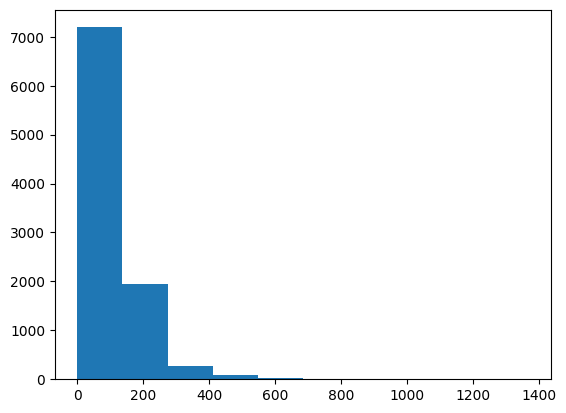

In [28]:
plt.hist('SQBmeaned',data=train_v2)

In [29]:
m_mean = train_v2.meaneduc.mean()
m_mean
train_v2.meaneduc = train_v2.meaneduc.fillna(m_mean)

In [30]:
s_mode =  train_v2.SQBmeaned.value_counts().sort_values(ascending=False).index[0] # index[0]임
train_v2.SQBmeaned = train_v2.SQBmeaned.fillna(s_mode)

In [31]:
corr_df = train_v2.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))

<ipython-input-31-21cd837a09c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = train_v2.corr()


##### 이상치 처리

In [32]:
train_v2.select_dtypes("object")
# dependency 의존도
# edjefe 남성 가장의 교육년수
# edjefa 여성 가장의 학력

,Id,idhogar,dependency,edjefe,edjefa,Target
3,ID_d671db89c,2b58d945f,yes,11,no,4
4,ID_d56d6f5f5,2b58d945f,yes,11,no,4
6,ID_e9e0c1100,2b58d945f,yes,11,no,4
7,ID_3e04e571e,d6dae86b7,yes,9,no,4
9,ID_51f52fdd2,d6dae86b7,yes,9,no,4
...,...,...,...,...,...,...
9535,ID_18b0a845b,9bbf7c6ca,1.5,no,5,1
9541,ID_a31274054,e87e70c06,1.5,2,no,2
9545,ID_32a00a8bf,a8eeafc29,.66666669,2,no,4
9551,ID_79d39dddc,212db6f6c,yes,no,no,2


In [33]:
backuptrain = train_v2.copy() # 전처리 중간 중간간백업용 만들어놓기

In [ ]:
# 이상치 처리 가능한가?
# import numpy as np
# depend = train_v2[(train_v2['dependency']!='yes') &(train_v2['dependency']!='no')]['dependency'].astype(float)
# qua_1, qua_3 = np.percentile(depend, [25,75])
# iqr = qua_3 - qua_1
# lower_whis=qua_1 -(iqr*1.5)
# upper_whis=qua_3 +(iqr*1.5)
# lower_whis, upper_whis

In [34]:
#train_v2.dependency.max() ouput : 'yes'
depend = train_v2[(train_v2['dependency']!='yes') &(train_v2['dependency']!='no')]['dependency'].astype(float)
d_max = max(depend)
d_min = min(depend)
d_max, d_min

(8.0, 0.16666667)

In [35]:
train_v2.dependency = train_v2.dependency.map(lambda x : d_max if x=="yes" else d_min if x=="no" else x ).astype(float)

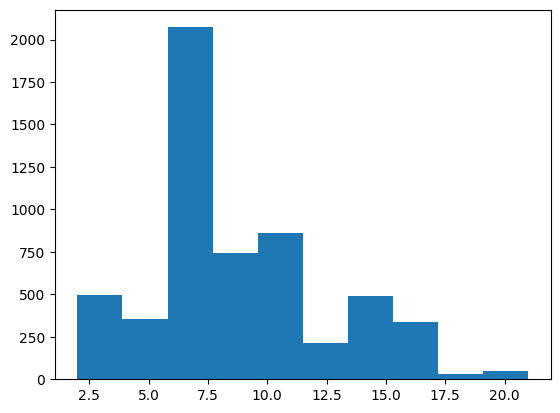

In [36]:
edjefe = train_v2[(train_v2['edjefe']!='yes') &(train_v2['edjefe']!='no')]['edjefe'].astype(float)
plt.hist(edjefe)
e_median = edjefe.median()
train_v2.edjefe = train_v2.edjefe.map(lambda x : e_median if x=="yes" else 0 if x=="no" else x ).astype(float)


7.0

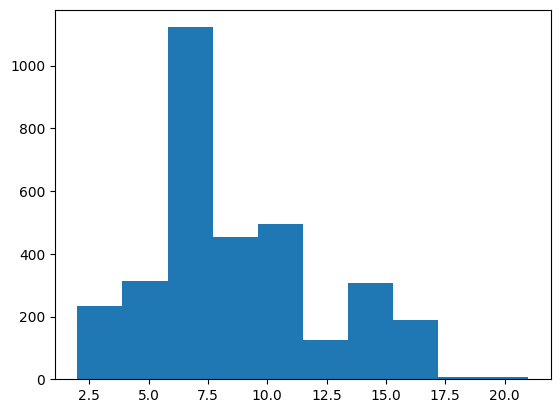

In [37]:
edjefa = train_v2[(train_v2['edjefa']!='yes') &(train_v2['edjefa']!='no')]['edjefa'].astype(float)
plt.hist(edjefa)
e_median = edjefa.median()
train_v2.edjefa = train_v2.edjefa.map(lambda x : e_median if x=="yes" else 0 if x=="no" else x ).astype(float)
e_median

In [39]:
pd.set_option("display.max_rows",200)
pd.DataFrame(train_v2.nunique())
# elimbasu5 고유값이 하나밖에 없으므로 해당 컬럼을 제외한다.
# 숫자형변수가 라벨인코딩 된 값을 가지고 있는지 확인을 해야하지만 너무 변수가 많으므로 이번 데이터에서는 생략하겠다.

,0
Id,9534
hacdor,2
rooms,11
hacapo,2
v14a,2
refrig,2
v18q,2
r4h1,6
r4h2,9
r4h3,9


### 머신러닝 모델 선정정 # ADP에서는 모델 성능보다는 모델 코드 세우고 해석이 더 중요!

In [ ]:
train_v2.iloc[:,-10:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9534 entries, 3 to 9552
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SQBescolari      9534 non-null   int64  
 1   SQBage           9534 non-null   int64  
 2   SQBhogar_total   9534 non-null   int64  
 3   SQBedjefe        9534 non-null   int64  
 4   SQBhogar_nin     9534 non-null   int64  
 5   SQBovercrowding  9534 non-null   float64
 6   SQBdependency    9534 non-null   float64
 7   SQBmeaned        9534 non-null   float64
 8   agesq            9534 non-null   int64  
 9   Target           9534 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 1.1+ MB


In [40]:
'''소프트맥스 회귀 다중 분류'''
from sklearn.model_selection import train_test_split

feature_columns = list(train_v2.columns.difference(['Id', 'idhogar','Target', 'elimbasu5']))
x = train_v2[feature_columns]
y=train_v2['Target']

'''층화 추출법'''
train_x, test_x, train_y, test_y = train_test_split(x,y, stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(6673, 136) (2861, 136) (6673,) (2861,)


##### 1. 소프트맥스 회귀 다중 분류

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scal = scaler.fit_transform(train_x) #Target 종속변수는 제외하고 나머지 숫자형인 변수는 scaler를 진행

In [ ]:
'''
lbfgs약자: "제한된 메모리 Broyden–Fletcher–Goldfarb–Shanno 알고리즘". Scikit-Learn Library에서 제공하는 솔버 알고리즘 중 하나입니다.

제한된 메모리라는 용어는 단순히 그래디언트 근사치를 암시적으로 나타내는 몇 개의 벡터만 저장한다는 의미입니다 .

상대적으로 작은 데이터 세트 에서 더 잘 수렴 됩니다 .
'''

'\nlbfgs약자: "제한된 메모리 Broyden–Fletcher–Goldfarb–Shanno 알고리즘". Scikit-Learn Library에서 제공하는 솔버 알고리즘 중 하나입니다.\n\n제한된 메모리라는 용어는 단순히 그래디언트 근사치를 암시적으로 나타내는 몇 개의 벡터만 저장한다는 의미입니다 .\n\n상대적으로 작은 데이터 세트 에서 더 잘 수렴 됩니다 .\n'

In [ ]:
from sklearn.linear_model import LogisticRegression

'''scaler 하기전에는 max_iter을 더 크게 잡아도 안돌아갔었는데 스케일 조정 후 돌아감'''
softm=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, max_iter=5000)
softm.fit(train_x_scal, train_y)

LogisticRegression(C=10, max_iter=5000, multi_class='multinomial')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#클래스가 치우쳐져 있을 때에는 auc 커브 등을 그래프화 또는 값을 보는 것도 좋은 방법임.
test_x_scal=scaler.transform(test_x)
pred=softm.predict(test_x_scal)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )
#다중 클래스 : macro, weighted, micro
#단순 산술 macro, 샘플 데이터 가중치 : weighted, 전체 샘플 기준 계산 : micro #default : binary
#불균형 클래스일 때에는 weighted가 이론상 맞을 수도.

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[  76   63    9   84]
 [  33  179   40  216]
 [  26   56   49  229]
 [  18   95   29 1659]]


정확도	68.61%
정밀도	52.41%
재현율	44.18%
F1	46.09%


#### 2. SVC

In [ ]:
'''SVM은 특성의 스케일에 민감하기 때문에 스케일 조정을 해주겠다.'''

'SVM은 특성의 스케일에 민감하기 때문에 스케일 조정을 해주겠다.'

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=0.5)
clf.fit(train_x_scal, train_y)

SVC(C=0.5)

In [ ]:
pred=clf.predict(test_x_scal)
'''macro 평균은 클래스별 f1-점수에 가중치를 주지 않는다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룬다.

weighted 평균은 클래스별 샘플 수로 가중치를 두어 f1-점수의 평균을 계산한다.

micro 평균은 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1-점수를 이 수치로 계산한다.

​

각 샘플을 똑같이 간주한다며 micr, 각 클래스를 동일한 비중으로 고려한다면 macro 평균이 좋다.'''

'macro 평균은 클래스별 f1-점수에 가중치를 주지 않는다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룬다.\n\nweighted 평균은 클래스별 샘플 수로 가중치를 두어 f1-점수의 평균을 계산한다.\n\nmicro 평균은 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1-점수를 이 수치로 계산한다.\n\n\u200b\n\n각 샘플을 똑같이 간주한다며 micr, 각 클래스를 동일한 비중으로 고려한다면 macro 평균이 좋다.'

In [ ]:
test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[  66   43    0  123]
 [   1  195    0  272]
 [   1   29   40  290]
 [   0   15    0 1786]]


정확도	72.95%
정밀도	84.62%
재현율	45.1%
F1	49.9%


#### 3. KneighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(train_x_scal, train_y)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
pred=clf.predict(test_x_scal)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))


#StandardScaler 하지 않았을때
# [[  35   43   10  144]
#  [  20   96   18  334]
#  [  12   42   21  285]
#  [  22   97   28 1654]]


# 정확도	63.12%
# 정밀도	42.39%
# 재현율	33.32%
# F1	33.9%

[[  62   27   12  131]
 [  12  154   25  277]
 [  12   27   60  261]
 [   2   35   20 1744]]


정확도	70.6%
정밀도	64.35%
재현율	43.28%
F1	47.5%


#### 4. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=8)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=8)

In [ ]:
pred=clf.predict(test_x)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

'''scaler 하기 전 후가 동일함
트리 깊이를 5->8로 옮기니, f1score 기준 40%에서 55% 가까이로 오름름'''

[[  80   56    8   88]
 [  28  227   16  197]
 [  13   62   96  189]
 [  24   83   12 1682]]


정확도	72.88%
정밀도	64.74%
재현율	50.76%
F1	54.29%


'scaler 하기 전 후가 동일함\n트리 깊이를 5->8로 옮기니, f1score 기준 40%에서 55% 가까이로 오름름'

In [ ]:
importances=clf.feature_importances_
column_nm=pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns=['feature_nm', 'importances']

In [ ]:
feature_importances.sort_values(by='importances' ,ascending=False)[:10]

,feature_nm,importances
74,meaneduc,0.177871
56,hogar_nin,0.072865
6,SQBmeaned,0.055662
19,dependency,0.051799
136,v18q,0.035123
113,r4t1,0.029066
100,pisomoscer,0.028447
54,hogar_adul,0.028131
112,r4m3,0.025518
16,cielorazo,0.024953


In [ ]:
# import matplotlib.pyplot as pyplot
# #from sklearn.metrics import plot_roc_curve, roc_auc_score
# from sklearn.metrics import roc_auc_score
# #plot_roc_curve(clf, x_test, y_test)
# #plt.show()
# R_A_score=roc_auc_score(test_y, clf.predict_proba(test_x)[:,1])
'''roc curve는 binary에서 가능한듯 ValueError: multi_class must be in ('ovo', 'ovr')'''

"roc curve는 binary에서 가능한듯 ValueError: multi_class must be in ('ovo', 'ovr')"

#### 5. DNN

In [ ]:
'''# 라벨 인코딩
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 원-핫 인코딩
Y_encoded = np_utils.to_categorical(Y)'''

'# 라벨 인코딩\ne = LabelEncoder()\ne.fit(Y_obj)\nY = e.transform(Y_obj)\n\n# 원-핫 인코딩\nY_encoded = np_utils.to_categorical(Y)'

In [ ]:
train_x.shape

(6673, 137)

In [ ]:
train_y.value_counts()


4    4200
2    1090
3     841
1     542
Name: Target, dtype: int64

In [ ]:
import numpy
import tensorflow as tf
from tensorflow import keras
# from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

#seed 설정
seed = 0
numpy.random.seed(seed)
# tf.set_random_seed(seed)


# 라벨 인코딩
# e = LabelEncoder()
# e.fit(Y_obj)
# Y = e.transform(Y_obj)

# 원-핫 인코딩
train_y_v2 = train_y.map({'4':3, '3':2, '2':1, '1':0}) # 0,1,2,3,
Y_encoded = np_utils.to_categorical(train_y_v2)


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(137,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

# model compile9Rrng
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(train_x, Y_encoded, epochs=15, batch_size = 5) # 원핫인코딩

print('\n Accuracy: %.4f' % (model.evaluate(train_x, Y_encoded)[1]))

Epoch 1/15
1335/1335 [==============================] - 7s 4ms/step - loss: 6.4379 - accuracy: 0.5407
Epoch 2/15
1335/1335 [==============================] - 6s 5ms/step - loss: 2.1866 - accuracy: 0.5777
Epoch 3/15
1335/1335 [==============================] - 5s 4ms/step - loss: 1.6903 - accuracy: 0.6033
Epoch 4/15
1335/1335 [==============================] - 6s 5ms/step - loss: 1.6034 - accuracy: 0.6054
Epoch 5/15
1335/1335 [==============================] - 5s 4ms/step - loss: 1.4807 - accuracy: 0.6074
Epoch 6/15
1335/1335 [==============================] - 5s 4ms/step - loss: 1.2831 - accuracy: 0.6233
Epoch 7/15
1335/1335 [==============================] - 6s 5ms/step - loss: 1.1662 - accuracy: 0.6305
Epoch 8/15
1335/1335 [==============================] - 5s 4ms/step - loss: 1.0566 - accuracy: 0.6376
Epoch 9/15
1335/1335 [==============================] - 6s 4ms/step - loss: 0.9725 - accuracy: 0.6468
Epoch 10/15
1335/1335 [==============================] - 7s 5ms/step - loss: 0.890

### IF 기울기 폭주 문제가 발생한다면?

- 역전파 알고리즘은 출력층에서 입력층으로 오차 그레디언트를 전파하면서 진행된다.
- 기울기가 폭주(Exploding Gradient), 즉 gradient가 점점 커져서 여러 층이 비정상적으로 큰 가중치로 갱신하면 발산할 수 있다. <> 기울기 소실(Vanishing Gradient)

1. 기울기 초기화 : 각 층의 연결 가중치를 무작위 초기화
```
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")
he_avg_init=keras.initializers.VarianceScaling(scale=2. mode= "fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)
```
2. 활성화 함수 조정 : 기울기 소실문제 해결방법으로 수렴하지 않은 활성화 함수를 선정하거나, 기울기 소실과 폭주 방지 방법으로 훈련하는 동안 각층의 출력이 평균 0과 표준편차 1을 유지하는 경향의 함수를 선택할 수 있다.
```
#leakyReLU사용하기
#z<0일때 함수의 기울기가 0이 아닌 0.01~0.2가 되도록 한다.
model = keras.models.Sequential([
  #[...]
  keras.layers.Dense(10,kernel_initializer="he_normal"),
  keras.layers.LeakyReLU(alph=0.2), #PReLU를 사용하려면 LeakyRelu를 PReLU로 바꾸면 됨
  #[...]
])
#SELU 사용하기
#스케일이 조정된 ELU 함수
#ELU함수란 : 지수함수를 사용하여 z<0이 그레디언트가 0이 아니지만 둥근선형태라 leakyrelu 등의 함수보다는 계산이 느리다.
#훈련하는 동안 각 층의 출력이 평균0과 표준편차 1을 유기하는 경향이 있다.
#(특정조건하에) 네트워크의 자기 정규화(self-normalize)를 보장한다.
layer = keras.layers.Dense(10, activation = "selu", kernel_initializer= "lecun_normal")
```
3. 배치 정규화 : 각 층의 뉴런마다 감마(출력 스케일 벡터), 베타(출력 이동 벡터), mu, sigma 등 네개의 파라미터 벡터가 학습하여 규제와 비슷한 역할을 한다. 미니배치마다 평균과 표준편차를 계산하므로 훈련데이터에 잡을 넣는다고 볼 수
있어 모델의 복잡도를 높인다. 신경망이 가중치 초기화에 덜 민감하도록 만든다.
```
#은닉층의 활성화함수 전이나 후에 batchnormalization 층을 추가해주면 된다.
model = keras.model.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(10, activation="softmax")
])
```

4. 그라디언트 클리핑(gradient clipping) : 역전파 과정에서 그라디언트가 일정 임계값을 넘어서지 못하도록 잘라내는 방법으로, RRN에서는 배치 정규화를 적용하기 어려워 이 방법을 많이 사용한다고 함.
```
#optimizer 생성시 clipvalue, clipnorm 매개변수를 지정하여 구현할 수 있음.
optimizer=keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)
```
5. 옵티마이저 변경 : 최적점을 향하여 더 일찍 갱신방향을 바꿀 수 있는 경사하강법을 사용한다. 본인의 이전 상태 값에 영향을 받는 모멘텀 벡터를 사용하며 일반 SGD 경사하강법보다 최적점 도달시까지 빠르게 가속된다.
```
optimizer= keras.optimizers.SGD(lr=0.001, momentum=0.9)
optimizer = keras.optimizers.RMSProp(lr=0.001, rho=0.9) # rho 는 식에서 베타를 의미
```
5. 학습률 스케줄링 변경 :  # 학습률이 너무 커서 발산할 수 있으므로 학습률을 수정한다. 그보다는 큰 학습률로 시작해 학습이 더뎌질때학습률 감소시키는 스케줄링을 바꿔보는 것도 방법.
```
#거듭제곱 기반 스케줄링
optimizer= keras.optimizers.SGD(lr=0.01, decay=1e-4)
#성능 기반 스케줄링
#최상의 검증 손실이 연속 5번의 epoch 동안 향상되지 않을 때마다 학습률에 0.5 곱함
lr_scheduler=keras.callbacks.ReduceLROnPLateau(factor=0.5, patience=5)
```
6. L1과 L2 규제 또는 드롭아웃 : 신경망의 연결 가중치에 제한을 두는 것.
```
# L1과 L2 규제 방법
## 일반적으로 모든 은닉층에 동일한 활성화 함수, 초기화 전략, 규제기법을 공통적으로 적용하므로 불필요한 반복을 위해 반복문을 사용하거나 functools.partial() 함수를 사용할 수 있다.
RegularizedDense= partial(keras.layers.Dense,
                           actication="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regulariziers.l2(0.01))
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  RegularizedDense(300),
  RegularizedDense(100),
  RegularizedDense(10, acitivation="softmax", kernel_initializer="glorot_uniform")
])
#드롭아웃
#훈련하는 동안 0.2의 비율로 뉴런을 버리고 남은 입력을 보존확률 0.8로 나누어준다.
# 조심할 것은 훈련 종료 후에는 어떠한 작업도 하지 않는다. #평가시.
# 모델이 과대적합되었다면 드롭아웃의 비율을 늘릴 수 있다.
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dropout(rate=0,2),
  keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
  keras.layers.Dropout(rate=0,2),
  keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
  keras.layers.Dropout(rate=0,2),
  keras.layers.Dense(10, activation="softmax")
])
```
- 정리하자면 1,. 기울기 자체를 초기화 시키거나, 2. 기울기 조정하는 활성화 함수 또는 규제를 입히거나, 3. 옵티마이저를 조정하거나 4. 학습률 스케줄링을 다르게 줄 수 있다. 또는 5. 데이터의 배치 정규화나 드롭아웃을 줄 수 있다.
방법은 여러가지이고, 주로 코드에서는 부가적인 인자를 넣은 층 또는 드롭아웃과 같은 기술적인 층을 삽입하거나, optimizer를 수정한다.



In [ ]:
#keras mlpclassifier의 경우에는 keras 내 voting_classifier에 추가해서(estimator에 mlp) 사용 할 수 있음 #같은 패키지라서 가능한 듯
# 다수결. 하드 포팅(어떤 행의 결과 값의 다수결), 소프트 보팅(소프트맥스 확률값을 평균으로 다수결).

## 앙상블

<Axes: xlabel='Target', ylabel='count'>

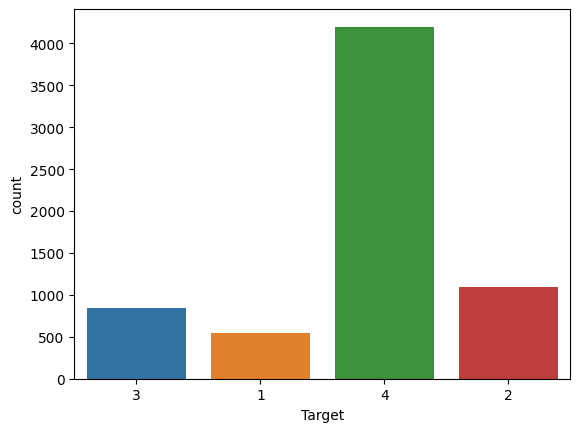

In [ ]:
import seaborn as sns
train_y_v3 = pd.DataFrame(train_y)
sns.countplot(x='Target', data=train_y_v3)

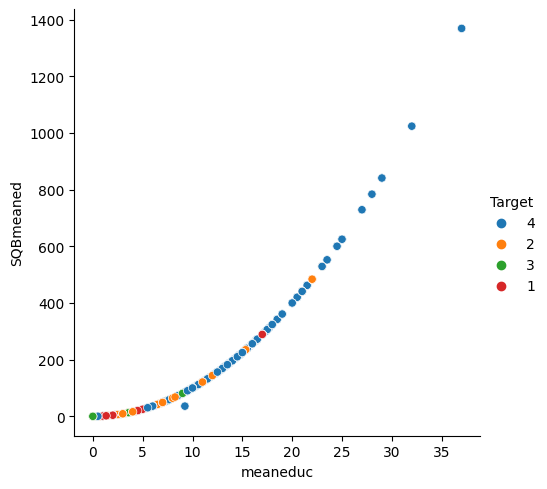

In [ ]:
sns.relplot(x='meaneduc', y='SQBmeaned', hue='Target', data=train_v2)# meaneduc을 제곱한 항이 SQBmeaned

##### 1) BaggingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf=BaggingClassifier(estimator=DecisionTreeClassifier()) #ood_score 인자?
pred = clf.fit(train_x_scal, train_y).predict(test_x_scal)
print("Accuracy Score : ", clf.score(test_x_scal, test_y))

# /usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
#   warnings.warn(

Accuracy Score :  0.9433764418035652


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(test_y, pred),
                index = ['G "1"', 'GT "2"', 'GT "3"', 'GT "4"'],
             columns=['Pred"1"','Pred"2"', 'Pred"3"', 'Pred"4"'])

,"Pred""1""","Pred""2""","Pred""3""","Pred""4"""
"G ""1""",208,4,0,20
"GT ""2""",9,415,9,35
"GT ""3""",2,7,308,43
"GT ""4""",7,14,12,1768


In [ ]:
test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[ 208    4    0   20]
 [   9  415    9   35]
 [   2    7  308   43]
 [   7   14   12 1768]]


정확도	94.34%
정밀도	93.68%
재현율	90.51%
F1	92.02%


##### 2) AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(estimator=None)
pred = clf.fit(train_x_scal, train_y).predict(test_x_scal)
print("Accuracy : ", clf.score(test_x_scal, test_y))  #왜이렇게 생겼지?

Accuracy :  0.6609577070954212


In [ ]:
test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[  72   74    5   81]
 [  54  158   20  236]
 [  14   73   36  237]
 [  37  118   21 1625]]


정확도	66.1%
정밀도	49.13%
재현율	41.26%
F1	42.16%


##### 3) randomforestClassifier

In [ ]:
, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
pred = clf.fit(train_x_scal, train_y).predict(test_x_scal)
print("Accuracy:", clf.score(test_x_scal, test_y))

Accuracy: 0.9094722125131073


In [ ]:

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[ 182    1    0   49]
 [   0  367    3   98]
 [   2    4  257   97]
 [   2    1    2 1796]]


정확도	90.95%
정밀도	95.59%
재현율	81.99%
F1	87.63%


In [ ]:
importances = clf.feature_importances_
importances # 컬럼 순서가 어떻게 되

array([1.50827922e-02, 3.23969466e-02, 2.24184738e-02, 1.62006194e-02,
       2.09072518e-02, 1.06695140e-02, 5.30395638e-02, 2.76727714e-02,
       2.08063537e-03, 2.36673068e-03, 4.18133921e-04, 1.50333909e-02,
       1.62169787e-02, 6.68113658e-03, 6.74528576e-03, 1.24885403e-02,
       1.76487091e-02, 2.64397859e-03, 4.24189898e-03, 2.69794534e-02,
       2.46826078e-03, 1.55331831e-02, 2.14012875e-02, 4.86655339e-03,
       1.97443785e-03, 4.32644759e-03, 2.67678383e-04, 0.00000000e+00,
       1.21899508e-05, 3.63696235e-04, 7.47944224e-03, 7.34979747e-03,
       4.23785502e-03, 4.82116066e-03, 6.83053668e-03, 9.39456532e-03,
       1.33585397e-02, 1.02673069e-03, 2.61292198e-03, 2.91891839e-03,
       7.81717611e-04, 1.90580542e-03, 1.05617027e-03, 2.29805762e-03,
       6.87380928e-03, 6.99751225e-03, 8.45059019e-03, 5.26741971e-03,
       6.60786153e-03, 1.44554475e-02, 1.94602273e-03, 1.30617363e-03,
       2.32771393e-03, 1.02134897e-02, 1.39431965e-02, 6.32914949e-03,
      

### IF 다중분류가 아닌 이중분류로 가정한다면

In [95]:
'''소프트맥스 회귀 이중 분류'''
from sklearn.model_selection import train_test_split

feature_columns = list(train_v2.columns.difference(['Id', 'idhogar','Target']))
x = train_v2[feature_columns]
y=train_v2['Target']
y= y.map({'4' : '비취약가구', '3': '복지대상가구', '2': '복지대상가구','1': '복지대상가구'})
'''층화 추출법'''
train_x, test_x, train_y, test_y = train_test_split(x,y, stratify=y, train_size=0.8, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(7627, 137) (1907, 137) (7627,) (1907,)


In [96]:
train_v2.Target.value_counts()

4    6001
2    1558
3    1201
1     774
Name: Target, dtype: int64

In [97]:
y.value_counts()

비취약가구     6001
복지대상가구    3533
Name: Target, dtype: int64

In [98]:
test_y.value_counts()

비취약가구     1200
복지대상가구     707
Name: Target, dtype: int64

In [99]:
train_y.value_counts()

비취약가구     4801
복지대상가구    2826
Name: Target, dtype: int64

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scal = scaler.fit_transform(train_x) #Target 종속변수는 제외하고 나머지 숫자형인 변수는 scaler를 진행

from sklearn.linear_model import LogisticRegression

'''scaler 하기전에는 max_iter을 더 크게 잡아도 안돌아갔었는데 스케일 조정 후 돌아감'''
softm=LogisticRegression(solver='lbfgs', C=10, max_iter=5000)
softm.fit(train_x_scal, train_y)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
test_x_scal=scaler.transform(test_x)
pred=softm.predict(test_x_scal)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

##종속변수 유니크 개수가 두개로 줄어들면서 #multi_class 인자를 기본값(auto)으로 변경한다

[[ 453  254]
 [ 172 1028]]


정확도	77.66%
정밀도	76.33%
재현율	74.87%
F1	75.43%


## oversampling
> 랜덤 오버 샘플링
- 소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다.
- 데이터를 단순 복제하기 떄문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있다.
- 오버피팅의 위험성이 있지만 불균형 문제를 처리하지 않는 것보다는 유효하기 때문에 종종 사용된다.

>SMOTE
- 소수 레이블을 지닌 데이터 세트의 관측 값에 대한 K개의 최근접 이윳(k-Nearest Neighbor)을 찾고, 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법

In [103]:
#random over sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(train_x,train_y)
print(Counter(y_over))

Counter({'복지대상가구': 4801, '비취약가구': 4801})


In [104]:
#smote
from imblearn.over_sampling import SMOTE
smote_sample=SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(train_x,train_y)
print(Counter(y_sm))

Counter({'복지대상가구': 4801, '비취약가구': 4801})


In [106]:
scaler = StandardScaler()
train_x_scal = scaler.fit_transform(x_over) #Target 종속변수는 제외하고 나머지 숫자형인 변수는 scaler를 진행

softm=LogisticRegression(solver='lbfgs', C=10, max_iter=5000) #multi_class 인자를 기본값으로 변경한다
softm.fit(train_x_scal, y_over)

test_x_scal=scaler.transform(test_x)
pred=softm.predict(test_x_scal)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[541 166]
 [275 925]]


정확도	76.87%
정밀도	75.54%
재현율	76.8%
F1	75.9%


In [107]:
scaler = StandardScaler()
train_x_scal = scaler.fit_transform(x_sm) #Target 종속변수는 제외하고 나머지 숫자형인 변수는 scaler를 진행

'''scaler 하기전에는 max_iter을 더 크게 잡아도 안돌아갔었는데 스케일 조정 후 돌아감'''
softm=LogisticRegression(solver='lbfgs', C=10, max_iter=5000)
softm.fit(train_x_scal, y_sm)

test_x_scal=scaler.transform(test_x)
pred=softm.predict(test_x_scal)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[ 454  253]
 [ 171 1029]]


정확도	77.77%
정밀도	76.45%
재현율	74.98%
F1	75.54%


In [ ]:
# 확실히 불균형 데이터를 다룰때에는 불균형 문제럴 처리하지 않은 것보다 오버 샘플링 하는 방법이 조금 더 성능이 좋다.
#이때 주의할점은 테스트 데이터는 원본 데이터여야 하고 학습시킬때 학습데이터만 오버 샘플링해서 클래스별 샘플 수를 동일하게 맞추는 기술을 적용해야한다.